# Outline

In this notebook, I use `requests` and `lxml` modules to extract the problem solution statistics directly from the Project Euler website. 

In [1]:
import requests
import lxml.html as lh
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime

In [2]:
url = "https://projecteuler.net/archives;page={}"

ids_solves = []
for page in range(1, 16):
    print("=="*16, "  ", page, "  ", "=="*16)
    # Get the first page
    page = requests.get(url.format(page))

    # Store the contents of the website under doc
    doc = lh.fromstring(page.content)

    # Parse data that are stored between <tr>..</tr> of HTML
    tr_elements = doc.xpath('//tr')

    ## Check the length of the first 5 rows
    #[len(T) for T in tr_elements[:5]]

    prob_id_num_solutions = []
    for row in tr_elements:
        temp = []
        for t in row.iterchildren():
            temp.append(t.text_content())
        prob_id_num_solutions.append(temp.copy())

    for row in prob_id_num_solutions[1:]:
        print(row)
        ids_solves.append([int(row[0]), int(row[2])])
    del prob_id_num_solutions
    print("")

stats = np.array(ids_solves, dtype=np.single)
del ids_solves

================================    1    ================================
['1', 'Multiples of 3 and 5', '964652']
['2', 'Even Fibonacci numbers', '767771']
['3', 'Largest prime factor', '550268']
['4', 'Largest palindrome product', '486057']
['5', 'Smallest multiple', '489674']
['6', 'Sum square difference', '492704']
['7', '10001st prime', '421009']
['8', 'Largest product in a series', '351653']
['9', 'Special Pythagorean triplet', '357134']
['10', 'Summation of primes', '326802']
['11', 'Largest product in a grid', '233419']
['12', 'Highly divisible triangular number', '220200']
['13', 'Large sum', '225378']
['14', 'Longest Collatz sequence', '225750']
['15', 'Lattice paths', '185877']
['16', 'Power digit sum', '228130']
['17', 'Number letter counts', '150390']
['18', 'Maximum path sum I', '143877']
['19', 'Counting Sundays', '133686']
['20', 'Factorial digit sum', '197315']
['21', 'Amicable numbers', '145208']
['22', 'Names scores', '133183']
['23', 'Non-abundant sums', '102914']
['

['201', 'Subsets with a unique sum', '2116']
['202', 'Laserbeam', '2319']
['203', 'Squarefree Binomial Coefficients', '8640']
['204', 'Generalised Hamming Numbers', '6903']
['205', 'Dice Game', '14249']
['206', 'Concealed Square', '23358']
['207', 'Integer partition equations', '4462']
['208', 'Robot Walks', '1614']
['209', 'Circular Logic', '2332']
['210', 'Obtuse Angled Triangles', '1575']
['211', 'Divisor Square Sum', '3871']
['212', 'Combined Volume of Cuboids', '1254']
['213', 'Flea Circus', '2138']
['214', 'Totient Chains', '4852']
['215', 'Crack-free Walls', '3460']
['216', 'Investigating the primality of numbers of the form 2n2-1', '3779']
['217', 'Balanced Numbers', '1377']
['218', 'Perfect right-angled triangles', '2854']
['219', 'Skew-cost coding', '1371']
['220', 'Heighway Dragon', '2055']
['221', 'Alexandrian Integers', '1915']
['222', 'Sphere Packing', '1949']
['223', 'Almost right-angled triangles I', '1378']
['224', 'Almost right-angled triangles II', '1110']
['225', 'T

['401', 'Sum of squares of divisors', '2299']
['402', 'Integer-valued polynomials', '350']
['403', 'Lattice points enclosed by parabola and line', '321']
['404', 'Crisscross Ellipses', '292']
['405', 'A rectangular tiling', '535']
['406', 'Guessing Game', '337']
['407', 'Idempotents', '2202']
['408', 'Admissible paths through a grid', '504']
['409', 'Nim Extreme', '411']
['410', 'Circle and tangent line', '249']
['411', 'Uphill paths', '564']
['412', 'Gnomon numbering', '440']
['413', 'One-child Numbers', '347']
['414', 'Kaprekar constant', '247']
['415', 'Titanic sets', '268']
['416', "A frog's trip", '262']
['417', 'Reciprocal cycles II', '750']
['418', 'Factorisation triples', '617']
['419', 'Look and say sequence', '438']
['420', '2x2 positive integer matrix', '390']
['421', 'Prime factors of n15+1', '573']
['422', 'Sequence of points on a hyperbola', '237']
['423', 'Consecutive die throws', '429']
['424', 'Kakuro', '353']
['425', 'Prime connection', '1301']
['426', 'Box-ball syste

['601', 'Divisibility streaks', '1763']
['602', 'Product of Head Counts', '419']
['603', 'Substring sums of prime concatenations', '354']
['604', 'Convex path in square', '438']
['605', 'Pairwise Coin-Tossing Game', '719']
['606', 'Gozinta Chains II', '327']
['607', 'Marsh Crossing', '1480']
['608', 'Divisor Sums', '264']
['609', 'π sequences', '793']
['610', 'Roman Numerals II', '493']
['611', 'Hallway of square steps', '279']
['612', 'Friend numbers', '567']
['613', 'Pythagorean Ant', '1528']
['614', 'Special partitions 2', '267']
['615', 'The millionth number with at least one million prime factors', '500']
['616', 'Creative numbers', '422']
['617', 'Mirror Power Sequence', '340']
['618', 'Numbers with a given prime factor sum', '859']
['619', 'Square subsets', '347']
['620', 'Planetary Gears', '159']
['621', 'Expressing an integer as the sum of triangular numbers', '485']
['622', 'Riffle Shuffles', '1442']
['623', 'Lambda Count', '275']
['624', 'Two heads are better than one', '520

(717, 2)


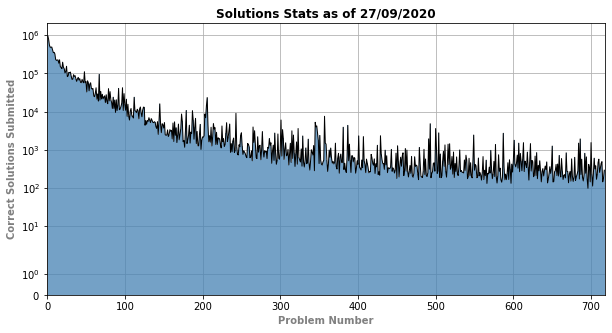

In [3]:
# Plot
print(stats.shape)

fig = plt.figure(figsize=(10., 5.))
plt.bar(stats[:, 0], stats[:, 1], width=1.0, align="center", color="steelblue", alpha=0.75)
plt.plot(stats[:, 0], stats[:, 1], ls="-", lw=1.0, color="black")
plt.yscale("symlog")
plt.title(f"Solutions Stats as of {datetime.today().strftime('%d/%m/%Y')}", 
          fontsize=12, fontweight="bold")
plt.xlabel("Problem Number", fontsize=10, fontweight="bold", color="gray")
plt.ylabel("Correct Solutions Submitted", fontsize=10, fontweight="bold", color="gray")
plt.xlim(-0.1, 718)
plt.grid()
plt.gca().set_axisbelow(True)
#
plt.savefig("./.images/solutions_stats.png", dpi=300, bbox_inches="tight", format="png")